In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/question-answer/Dataset_Python_Question_Answer.csv
/kaggle/input/data-assistants-with-gemma/submission_categories.txt
/kaggle/input/data-assistants-with-gemma/submission_instructions.txt


In [10]:
import time
from time import gmtime, strftime
start = time.time()
print("GMT : ",time.strftime("%a, %d %b %Y %I:%M:%S %p %Z", time.gmtime()))

GMT :  Sat, 30 Mar 2024 09:47:07 AM GMT


In [11]:
import sklearn
print(sklearn.__version__)
!python --version

1.2.2
Python 3.10.13


In [12]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [13]:
dataset = pd.read_csv('/kaggle/input/question-answer/Dataset_Python_Question_Answer.csv')

In [14]:
dataset.shape

(419, 2)

In [15]:
pd.set_option("display.max_colwidth", 3000)

In [16]:
dataset.sample(5)

,Question,Answer
116,How can you write a string to a file?,"[""A string can be written to a file in a few ways, depending on the programming language and platform you're working with. Here's a breakdown of three common methods:"", '**Method 1: Using File I/O**', '* Open a file using a specific mode (e.g., `open()` in Python).', ""* Write the string's contents to the file, using the `write()` method."", '* The `write()` method takes a string as its argument, and it will write its contents to the file.', ""* Remember to close the file after you're finished writing to ensure the data is saved properly."", '**Method 2: Using String Interpolation**', '* Use string concatenation operators (e.g., `+` and `-`) to build the string and then write it to the file.', '* For example, the following code writes the string ""Hello world!"" to a file called `data.txt`:', '```python', 'file_name = ""data.txt""', 'file_content = ""Hello world!""', 'with open(file_name, ""w"") as file:', ' file.write(file_content)', '```', '**Method 3: Using Libraries**', '* Libraries like `pandas` and `file` in Python can be used to write strings to files.', '* These libraries typically provide functions that write data structures like lists and dictionaries to files.', '* You can also use libraries like `os` in Python to directly interact with operating systems and write strings to files.', ""Here's an example that demonstrates each method:"", '```python', '# Method 1', 'with open(""file.txt"", ""w"") as file:', ' file.write(""This is the first line.\\n"")', ' file.write(""This is the second line."")', '# Method 2', 'file_content = ""Hello world!""', 'with open(""file.txt"", ""w"") as file:', ' file.write(file_content)', '# Method 3', 'data = [""Hello"", ""world""]', 'with open(""data_file.txt"", ""w"") as file:', ' file.write("""".join(data))', '```', ""These methods can be adapted depending on the specific language and platform you're working with. Remember to choose the most appropriate method for your needs and consider the specific requirements of the file you're trying to write.""]"
203,What is recursion with a default case in Python? Give an example.**,"[""Sure. Here's an example of recursion with a default case in Python:"", '```python', 'def factorial(n):', ' """"""', ' This function computes the factorial of a non-negative integer n.', ' If n is 0, the factorial is defined to be 1.', ' """"""', ' if n == 0:', ' return 1', ' else:', ' return n * factorial(n-1)', 'print(factorial(5))', '```', '**Explanation:**', '1. The `factorial()` function takes a single argument, `n`, which represents the non-negative integer for which the factorial is calculated.', '2. It has a base case if `n` is equal to 0: If `n` is 0, the factorial of 0 is defined to be 1. This is a recursive base case that stops the recursion when `n` reaches 0.', '3. For values of `n` greater than 0, the function recursively calls itself with the argument `n-1` and multiplies the result by `n`. This recursive step computes the factorial of `n`.', '4. If no other base cases apply, the function returns the result of the recursive call with the argument `n-1`. This is the recursive case of the recursion.', '5. Finally, the `factorial()` function is called with the argument 5, which triggers the recursion process. The result of this recursive call is printed to the console.', 'The output of this code will be 120, which is the factorial of 5.']"
256,Define a function that takes a string and two numbers as arguments and returns the first letter of each word. Use string slicing and loops. **,"['```python', 'def get_first_letter(text, num1, num2):', ' # Split the text string into a list of words. ', ' words = text.split()', ' # Loop through the words in the list.', ' for word in words:', ' # Get the first letter of the word.', ' first_letter = word[0]', ' # Return the first letter of the word.', ' return first_letter', '```']"
245,How can you define a custom class that inherits from the collections mo

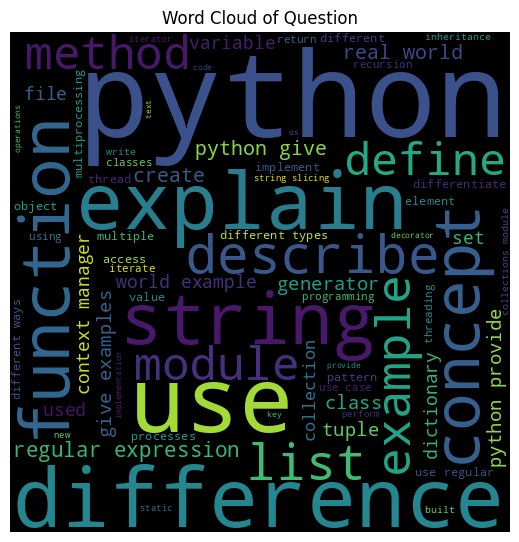

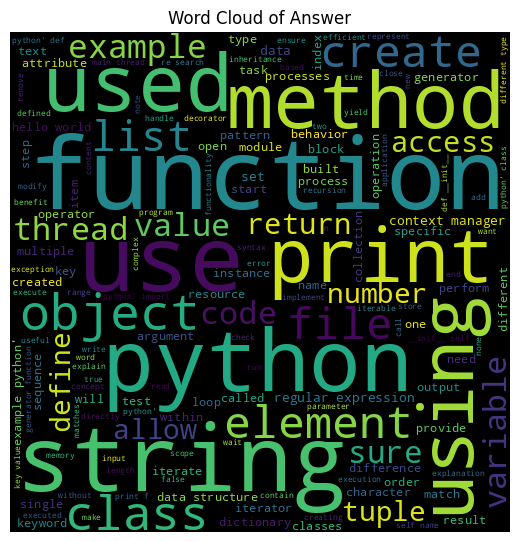

In [17]:
comment_words = ''
stopwords = set(STOPWORDS)
#print(stopwords)

columns=list(dataset)
for col in columns:
    for val in dataset[col]:
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()     
        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 500, height = 500,
                    background_color ='black',
                    stopwords = stopwords,      
                    min_font_size = 8).generate(comment_words)

    # plot the WordCloud image                       
    plt.figure(figsize = (5, 5), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    title="Word Cloud of " + col
    plt.title(title)
    plt.show()

In [18]:
%%capture
!pip install -U keras-nlp
!pip install -q -U keras>=3

In [19]:
%%capture
# The %%capture magic command is used to suppress the output of the cell.

import pandas as pd
# Importing the pandas library as pd. Pandas is a powerful data manipulation and analysis library.

from tqdm.notebook import tqdm
# Importing tqdm from the notebook submodule of the tqdm library. tqdm is used for creating progress bars in loops.

tqdm.pandas() 
# Configuring tqdm to work with pandas, allowing progress bars for operations on pandas objects.

import numpy as np
# Importing the numpy library as np. Numpy is a fundamental package for scientific computing in Python.

import re
# Importing the re module. re is Python's regular expression module, used for pattern matching in strings.

import matplotlib.pyplot as plt
# Importing the pyplot module from the matplotlib library as plt. Matplotlib is a plotting library for Python.

import keras
# Importing the keras library. Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.

import keras_nlp
# Importing the keras_nlp library. This likely contains additional tools or utilities specific to natural language processing tasks in Keras.

from IPython.display import display, Markdown
# Importing display and Markdown classes from IPython.display module. This allows displaying rich content and Markdown text in the notebook.

2024-03-30 09:50:11.397345: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-30 09:50:11.397551: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-30 09:50:11.565834: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
import os
# Importing the os module. This module provides a way to interact with the operating system.

os.environ["KERAS_BACKEND"] = "jax"  # Or "torch" or "tensorflow"
# Setting the environment variable "KERAS_BACKEND" to "jax". This specifies the backend for Keras, which determines the library used for tensor operations and training neural networks. Options include "jax", "torch", or "tensorflow".

# Avoid memory fragmentation on JAX backend.
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"]="1.00"
# Setting the environment variable "XLA_PYTHON_CLIENT_MEM_FRACTION" to "1.00". This is specific to the JAX backend and is used to configure the memory allocation fraction for XLA (Accelerated Linear Algebra) computations in JAX. This can help avoid memory fragmentation issues.

In [21]:
%%capture
# The %%capture magic command is used to suppress the output of the cell.

#gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset("gemma_2b_en")
# Creating a GemmaCausalLM (language model) instance using the "gemma_2b_en" preset. This line is commented out.

gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset("gemma_instruct_2b_en")
# Creating a GemmaCausalLM (language model) instance using the "gemma_instruct_2b_en" preset.

gemma_lm.summary()
# Generating a summary of the GemmaCausalLM model.

normalizer.cc(51) LOG(INFO) precompiled_charsmap is empty. use identity normalization.


In [22]:
gemma_lm.compile()

In [23]:
template = "Instruction:\n{instruction}\n\nResponse:\n{response}"

In [24]:
prompt = template.format(
    instruction="How many Keywords are there in Python programming language?",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

I0000 00:00:1711792452.883769      65 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-03-30 09:54:12.929420: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


Instruction:
How many Keywords are there in Python programming language?

Response:
The number of keywords in the Python programming language is around 100.


In [25]:
"""import keyword

print(keyword.kwlist)"""
#['False', 'None', 'True', 'and', 'as', 'assert', 'async', 'await', 'break', 'class', 'continue', 'def', 'del', 'elif', 'else', 'except', 'finally', 'for', 'from', 'global', 'if', 'import', 'in', 'is', 'lambda', 'nonlocal', 'not', 'or', 'pass', 'raise', 'return', 'try', 'while', 'with', 'yield']

'import keyword\n\nprint(keyword.kwlist)'

In [ ]:
prompt = template.format(
    instruction="What are the key features of Python?.",
    response="",
)
print(gemma_lm.generate(prompt, max_length=512))

In [ ]:
prompt = template.format(
    instruction="What is tuple in Python?.",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

In [ ]:
# Enable LoRA for the model and set the LoRA rank to 4/8/12/16/...
# This comment describes the purpose of the following code: enabling LoRA (Local Rank Adaptation) for the model and setting the LoRA rank to one of the specified values (4, 8, 12, or 16).

gemma_lm.backbone.enable_lora(rank=4)
# Enabling LoRA for the backbone of the GemmaCausalLM model with a specified rank of 4. LoRA is a technique used for adapting the local ranks of layers in a neural network.

gemma_lm.summary()
# Generating a summary of the GemmaCausalLM model after enabling LoRA. This summary provides information about the architecture and parameters of the model.

In [ ]:
gemma_lm.preprocessor.sequence_length = 128

In [ ]:
optimizer = keras.optimizers.AdamW(
    learning_rate=5e-6,
    weight_decay=0.01,
)

In [ ]:
#join dataset columns
output=pd.DataFrame(columns=["QA"])
output=dataset["Question"]+dataset["Answer"]

In [ ]:
# Exclude layernorm and bias terms from decay.
# This comment describes the purpose of the following code: to exclude layernorm and bias terms from weight decay during optimization.

# optimizer.exclude_from_weight_decay(var_names=["bias", "scale"])
# This line of code is commented out and seems to be intended to configure the optimizer to exclude certain variables (specifically, "bias" and "scale") from weight decay. However, it is not directly executed in this snippet.

gemma_lm.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
    weighted_metrics=[keras.metrics.SparseCategoricalAccuracy()],
)
# Compiling the GemmaCausalLM model with a specified loss function, optimizer, and metrics. This prepares the model for training.

gemma_lm.fit(output, epochs=1, batch_size=1)
# Training the GemmaCausalLM model for one epoch using the provided training data (output). The batch size is set to 1, indicating that each iteration will process a single example.

In [ ]:
prompt = template.format(
    instruction="What are the key features of Python?.",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

In [ ]:
prompt = template.format(
    instruction=" What is PEP 8 in python?",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

In [ ]:
prompt = template.format(
    instruction="Please generate the list of all Keywords of Python language.",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

In [ ]:
prompt = template.format(
    instruction="Is Python a strong or weak language?",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

In [ ]:
prompt = template.format(
    instruction="Explain the concept of metaprogramming in Python.",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

In [ ]:
prompt = template.format(
    instruction="How do you use `None` in Python?",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

In [ ]:
prompt = template.format(
    instruction="How do you handle exceptions in Python?",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

In [ ]:
prompt = template.format(
    instruction="Explain the concept of recursion in Python with an example.",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=1024))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

In [ ]:
prompt = template.format(
    instruction="Describe the differences between `collections` and `OrderedDict",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

In [ ]:
prompt = template.format(
    instruction="What are the differences between `def` and `function` in python?",
    response="",
)
# Creating a prompt using the provided template format. The placeholder "{instruction}" is replaced with the instruction text, and "{response}" is left empty.

print(gemma_lm.generate(prompt, max_length=512))
# Generating text based on the prompt using the GemmaCausalLM model. The generated text is printed to the console. The "max_length" parameter specifies the maximum length of the generated text.

In [ ]:
end = time.time()
# Capturing the current time after the execution of the program or a specific portion of the code.

print("The time of execution of above program is :",(end-start) * 10**3, "ms")
# Calculating and printing the execution time of the program or a specific portion of the code in milliseconds.

print("GMT : ",time.strftime("%a, %d %b %Y %I:%M:%S %p %Z", time.gmtime()))
# Printing the current GMT time using the time.strftime() function with the specified format ("%a, %d %b %Y %I:%M:%S %p %Z").
# The time.gmtime() function returns the current time in GMT.